# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa faktor terbesar yang mempengaruhi jumlah rental?
- Pertanyaan 2 : Bagaimana prediksi setahun kedepan?

## Import Semua Packages/Library yang Digunakan

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Gathering Data

In [2]:
df_day =  pd.read_csv("day.csv")
df_day


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hr_df = pd.read_csv("hour.csv")
hr_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
hr_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print(df_day.duplicated().sum())
print(hr_df.duplicated().sum())

0
0


In [8]:
print("casual users = ", df_day["casual"].sum())
print("registered users = ", df_day["registered"].sum())
print("total = ", df_day["cnt"].sum())

casual users =  620017
registered users =  2672662
total =  3292679


## Exploratory Data Analysis (EDA)

(array([ 13.,  62.,  71.,  73., 122., 137.,  81.,  76.,  79.,  17.]),
 array([  22. ,  891.2, 1760.4, 2629.6, 3498.8, 4368. , 5237.2, 6106.4,
        6975.6, 7844.8, 8714. ]),
 <BarContainer object of 10 artists>)

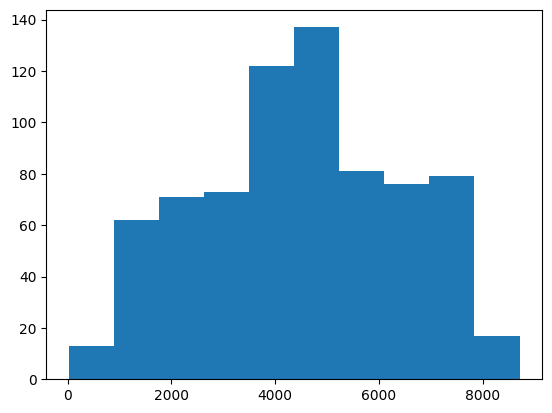

In [50]:
plt.hist(df_day["cnt"])

### Explore ...

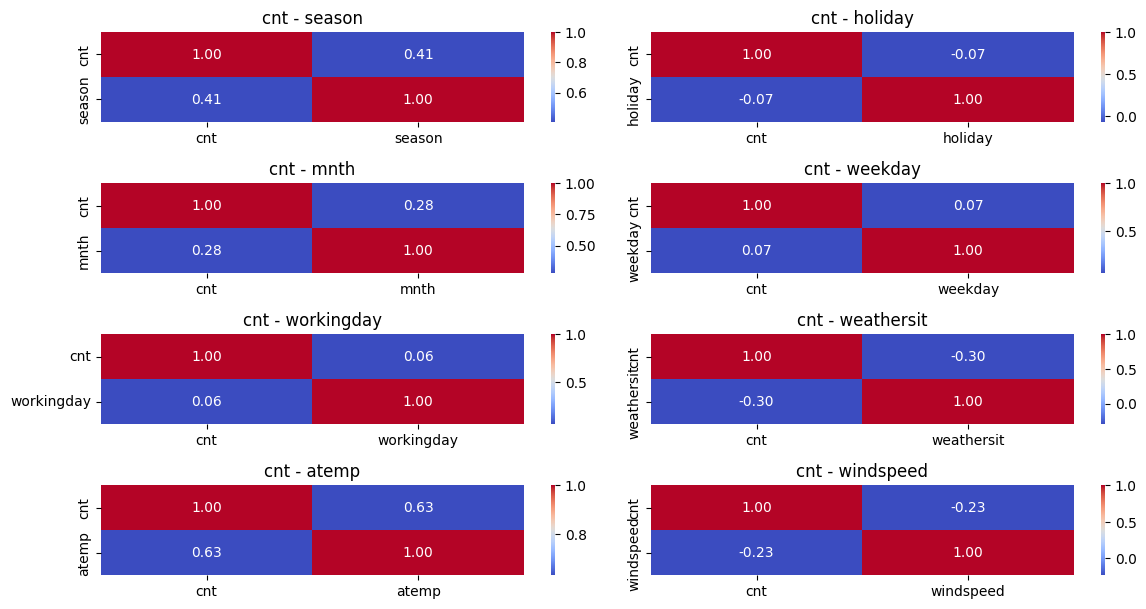

In [9]:
plt.figure(figsize=(12, 12))

plt.subplot(8, 2, 1)
sns.heatmap(df_day[['cnt', 'season']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('cnt - season')

plt.subplot(8, 2, 2)
sns.heatmap(df_day[['cnt', 'holiday']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('cnt - holiday')

plt.subplot(8, 2, 3)
sns.heatmap(df_day[['cnt', 'mnth']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('cnt - mnth')

plt.subplot(8, 2, 4)
sns.heatmap(df_day[['cnt', 'weekday']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('cnt - weekday')

plt.subplot(8, 2, 5)
sns.heatmap(df_day[['cnt', 'workingday']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('cnt - workingday')

plt.subplot(8, 2, 6)
sns.heatmap(df_day[['cnt', 'weathersit']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('cnt - weathersit')

plt.subplot(8, 2, 7)
sns.heatmap(df_day[['cnt', 'atemp']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('cnt - atemp')

plt.subplot(8, 2, 8)
sns.heatmap(df_day[['cnt', 'windspeed']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('cnt - windspeed')

plt.tight_layout()
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

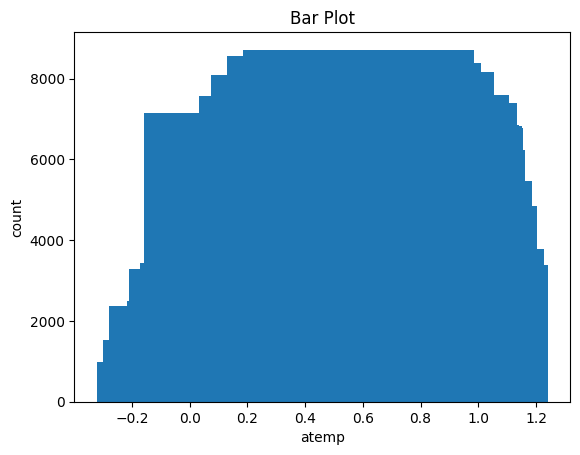

In [10]:
count_col = df_day["cnt"]
atemp_col = df_day["atemp"]

plt.bar(atemp_col, count_col)
plt.xlabel('atemp')
plt.ylabel('count')
plt.title('Bar Plot')

plt.show()

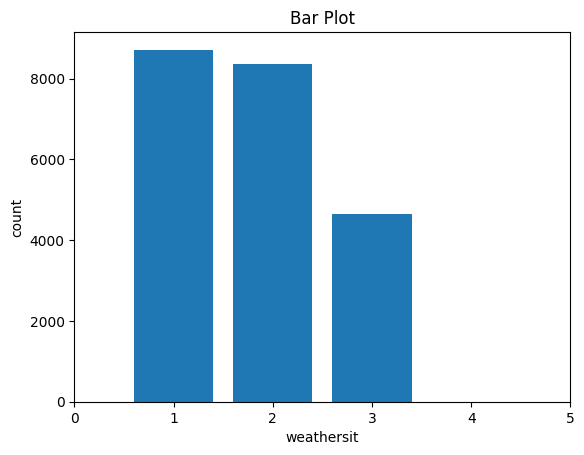

In [11]:
weath_col = df_day["weathersit"]

plt.bar(weath_col, count_col)
plt.xlabel('weathersit')
plt.ylabel('count')
plt.title('Bar Plot')

# Menentukan range sumbu x dari 0 hingga panjang data
plt.xlim(0, 5)
plt.show()


## Cleaning data untuk Prediction

In [12]:
drop_day = ['instant', 'windspeed', 'weekday', 'holiday', 'workingday']

for i in df_day.columns:
  if i in drop_day:
    df_day.drop(labels=i, axis=1, inplace=True)

df_day.head()

,dteday,season,yr,mnth,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [14]:
drop_day = ['instant', 'windspeed', 'weekday', 'holiday', 'workingday', 'dteday', 'registered', 'casual']

for i in df_day.columns:
  if i in drop_day:
    df_day.drop(labels=i, axis=1, inplace=True)

df_day.head()

,season,yr,mnth,weathersit,temp,atemp,hum,cnt,date
0,1,0,1,2,0.344167,0.363625,0.805833,985,2011-01-01
1,1,0,1,2,0.363478,0.353739,0.696087,801,2011-01-02
2,1,0,1,1,0.196364,0.189405,0.437273,1349,2011-01-03
3,1,0,1,1,0.200000,0.212122,0.590435,1562,2011-01-04
4,1,0,1,1,0.226957,0.229270,0.436957,1600,2011-01-05


In [15]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   season      731 non-null    int64         
 1   yr          731 non-null    int64         
 2   mnth        731 non-null    int64         
 3   weathersit  731 non-null    int64         
 4   temp        731 non-null    float64       
 5   atemp       731 non-null    float64       
 6   hum         731 non-null    float64       
 7   cnt         731 non-null    int64         
 8   date        731 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 51.5 KB


## Data Wrangling untuk prediction

In [13]:
df_day['date'] = pd.to_datetime(df_day['dteday'], format='%Y-%m-%d')
df_day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    object        
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   weathersit  731 non-null    int64         
 5   temp        731 non-null    float64       
 6   atemp       731 non-null    float64       
 7   hum         731 non-null    float64       
 8   casual      731 non-null    int64         
 9   registered  731 non-null    int64         
 10  cnt         731 non-null    int64         
 11  date        731 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(7), object(1)
memory usage: 68.7+ KB


In [16]:
df_day['Year'] = pd.to_datetime(df_day['date']).dt.year
df_day['Month'] = pd.to_datetime(df_day['date']).dt.month
df_day['Day'] = pd.to_datetime(df_day['date']).dt.day

In [18]:
df_day.drop(columns=['date'], inplace=True)

In [19]:
X = df_day.drop(columns=['cnt'])  # Ambil semua kolom kecuali kolom 'Target'
Y = df_day['cnt']  # Ambil kolom 'Target'

In [21]:
print(X)

     season  yr  mnth  weathersit      temp     atemp       hum  Year  Month   
0         1   0     1           2  0.344167  0.363625  0.805833  2011      1  \
1         1   0     1           2  0.363478  0.353739  0.696087  2011      1   
2         1   0     1           1  0.196364  0.189405  0.437273  2011      1   
3         1   0     1           1  0.200000  0.212122  0.590435  2011      1   
4         1   0     1           1  0.226957  0.229270  0.436957  2011      1   
..      ...  ..   ...         ...       ...       ...       ...   ...    ...   
726       1   1    12           2  0.254167  0.226642  0.652917  2012     12   
727       1   1    12           2  0.253333  0.255046  0.590000  2012     12   
728       1   1    12           2  0.253333  0.242400  0.752917  2012     12   
729       1   1    12           1  0.255833  0.231700  0.483333  2012     12   
730       1   1    12           2  0.215833  0.223487  0.577500  2012     12   

     Day  
0      1  
1      2  
2     

### train model dengan Random Forest Clasifier

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)

rfy_pred = random_forest_model.predict(X_test)


### save model

In [42]:
import pickle

# Menyimpan model ke file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(random_forest_model, f)

### load model

In [43]:
import pickle

# Memuat model dari file
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

### membagi 2 fitur sebagai sampel prediksi

In [44]:
half_length = len(X) // 2
X_new = X.iloc[:half_length, :]

## Hasil Prediksi menggunakan setengah dari total baris dari fitur yang ada

(array([21., 39., 40., 32., 37., 68., 88., 32.,  5.,  3.]),
 array([ 506. , 1141.8, 1777.6, 2413.4, 3049.2, 3685. , 4320.8, 4956.6,
        5592.4, 6228.2, 6864. ]),
 <BarContainer object of 10 artists>)

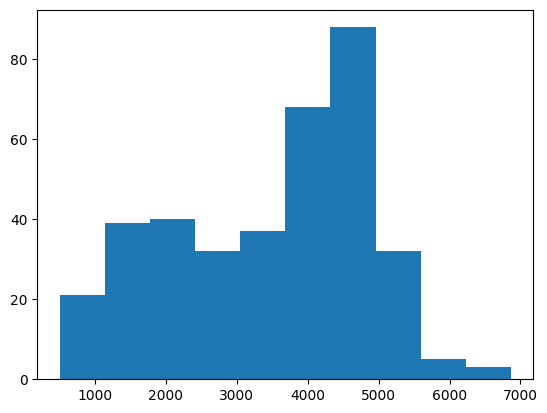

In [48]:
predicted = loaded_model.predict(X_new)
plt.hist(predicted)

#### Pertanyaan 2: Model dapat digunakan untuk melakukan prediksi satu tahun kedepan. Dapat dilihat histogram sebenarnya dengan histogram hasil prediksi dari model cukup mirip menandakan akurasi model cukup baik. Jika mengibaratkan data yang digunakan untuk prediksi tersebut adalah data tahun depan maka dapat dilihat hasil "predicted" merupakan bagaimana jumlah orang yang merental tahun depan

#### Model ini merupakan model yang dilatih hanya secara garis besar saja 

In [62]:
predicted = loaded_model.predict(X_new)

In [59]:
cnt_tes = len(df_day["cnt"]) // 2
cnt_new = df_day["cnt"].iloc[:cnt_tes]


(array([21., 39., 40., 32., 37., 68., 88., 32.,  5.,  3.]),
 array([ 506. , 1141.8, 1777.6, 2413.4, 3049.2, 3685. , 4320.8, 4956.6,
        5592.4, 6228.2, 6864. ]),
 <BarContainer object of 10 artists>)

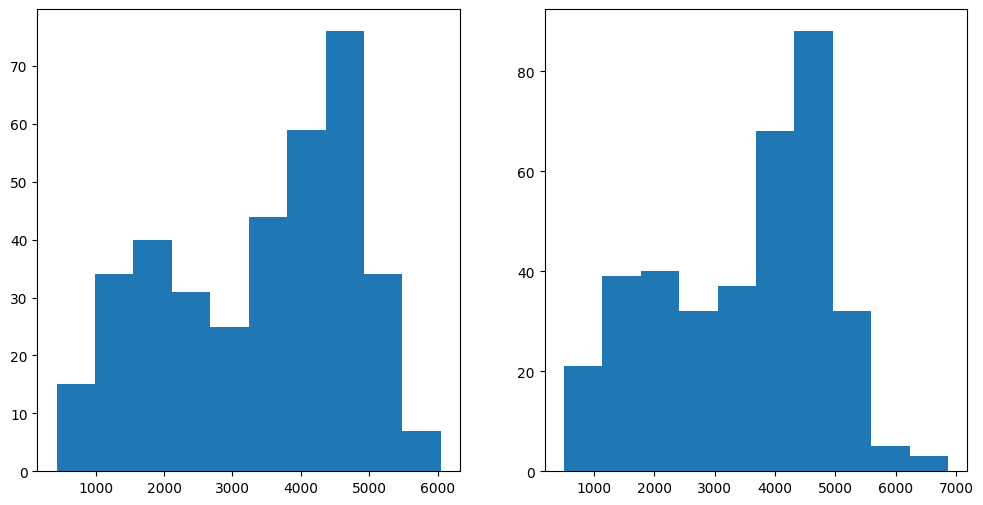

In [73]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(cnt_new)

plt.subplot(1,2, 2)
plt.hist(predicted)

## Conclusion

- Conclution pertanyaan 1 : 
    Dua faktor yang terbesar yang mempengaruhi jumlah orang yang merental sepeda yaitu wheatersit (cuaca) dan suhu(atemp). Dimana cuaca Clear, Few clouds, Partly cloudy, Partly cloudy Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist mencapai jumlah rental lebih dari 8000 per hari nya. Sedangkan untuk cuaca Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, jumlah orang yang merental sepeda menurun menjadi hanya sekitar 4000-an pengguna. Pada cuaca saat Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog sama sekali tidak ada orang yang merental sepeda.
- Conclution pertanyaan 2 :
    Jika data yang digunakan adalah data untuk tahun depan, hasil jumlah rental dapat dibilang hampir mirip dengan tahun sebelumnya